In [1]:
import numpy as np
import cmath as ct
import matplotlib.pyplot as plt
import mpmath as mp

In [2]:
x = np.arange(-2,2, 4/70,float)
zl = np.arange(-2,0, 2/70,float)
zr = np.arange(0,2, 2/70,float)
t = np.arange(-39,39,78/999,float)
x0 = 1.0
z0 = 2.0
beta = 1.0
Dmu = 1.0
Dep = 1.0
b = 0.05
dt = t[2]-t[1]

In [3]:
s = (len(x),len(zl))
A = (1j*0.0+0.0)*np.zeros(s)
B = (1j*0.0+0.0)*np.zeros(s)
for i in range(0,len(x)):
    for j1 in range(0,len(zl)):
        ai = 0
        for k in range(0,len(t)):
            ai += (beta/(4*np.pi))*1*ct.exp(1j*np.sqrt((x[i]+x0)**2+(zl[j1]+z0)**2)*(1+1j*b)*np.cosh(t[k]))
        A[i,j1] = (dt)*ai
        B[i,j1] = (1j/4)*mp.hankel1(0,np.sqrt((x[i]+x0)**2+(zl[j1]+z0)**2))


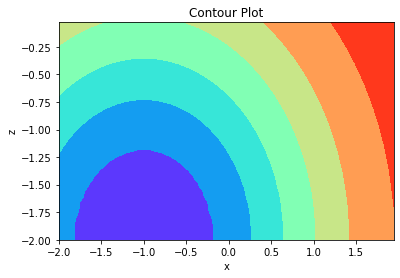

In [4]:
[X, Y] = np.meshgrid(x, zl) 
   
fig, ax = plt.subplots(1, 1) 
   
   
# plots contour lines 
ax.contourf(X, Y, np.imag(np.transpose(A)),cmap = "rainbow") 
   
ax.set_title('Incident Electric Field') 
ax.set_xlabel('x') 
ax.set_ylabel('z') 
   
plt.show() 
    

Text(0, 0.5, 'z')

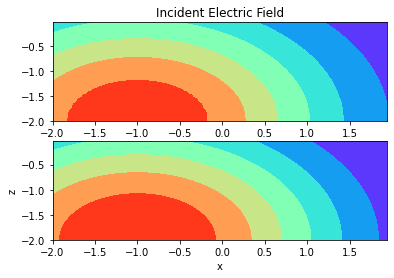

In [4]:
[X, Y] = np.meshgrid(x, zl) 
   
fig, (ax,ay)= plt.subplots(2, 1) 
   
   
# plots contour lines 
ax.contourf(X, Y, np.imag(np.transpose(A)),cmap = "rainbow") 
ay.contourf(X, Y, np.imag(np.transpose(B)),cmap = "rainbow")   
ax.set_title('Incident Electric Field') 
ay.set_xlabel('x') 
ay.set_ylabel('z') 

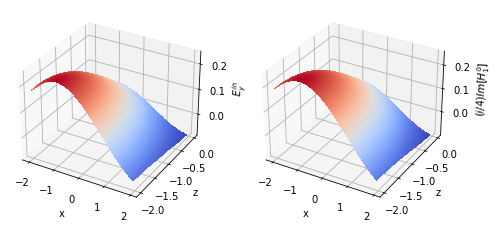

In [5]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt


# imports specific to the plots in this example
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

# Twice as wide as it is tall.
fig = plt.figure(figsize=plt.figaspect(0.5))

#---- First subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
X, Y = np.meshgrid(x, zl)
Z = np.imag(np.transpose(A))
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('$E^{in}_{y}$');
#ax.set_zlim3d(-1.01, 1.01)

#fig.colorbar(surf, shrink=0.5, aspect=10)

#---- Second subplot
Z1 = np.imag(np.transpose(B))
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim3d(-1.01, 1.01)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('$(i/4)Im[H^{0}_{1}]$');

plt.show()